# Gradient Descent Method

## Definitions

In [1]:
import numpy as np
import matplotlib.pyplot as plt


- We want to minimize this function using the Gradient Descent Method

\begin{equation}
f(\mathbf{x}) = 0.5 \left( x_1 - 4.5 \right)^2 + 2.5 \left( x_2 - 2.3 \right)^2\end{equation}

- The gradient of this function is given by:\begin{equation}
\nabla f(\mathbf{x}) = \begin{bmatrix} \displaystyle \frac{\partial f}{\partial x_1} \\ \displaystyle\frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix} x_1 - 4.5 \\ 5 \left( x_2 - 2.3 \right) \end{bmatrix}
\end{equation}

- Define two functions. 

    - One that given a point $\mathbf{x}$, if computes $f(x)$:

    - One that given a point $\mathbf{x}$, if computes $\nabla f(\mathbf{x})$


In [2]:
def f(x):
    '''Objective function'''
    return 0.5*(x[0] - 4.5)**2 + 2.5*(x[1] - 2.3)**2

def df(x):
    '''Gradient of the objective function'''
    return np.array([x[0] - 4.5, 5*(x[1] - 2.3)])

- Compute the minimum of this function using the `scipy` library [SciPy](https://scipy.org/) with the `minimize` method [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

    - Pass np.zeros(2) as `x0`and use `method='trust-constr'`
 
```python
# Expected Output: array([4.5, 2.3])

In [3]:
from scipy.optimize import minimize

result = minimize(
    f, np.zeros(2), method='trust-constr', jac=df)

result.x

array([4.5, 2.3])

- Plot the objective function and its minimizer. Rum the following code. Does it agree with the previous result?

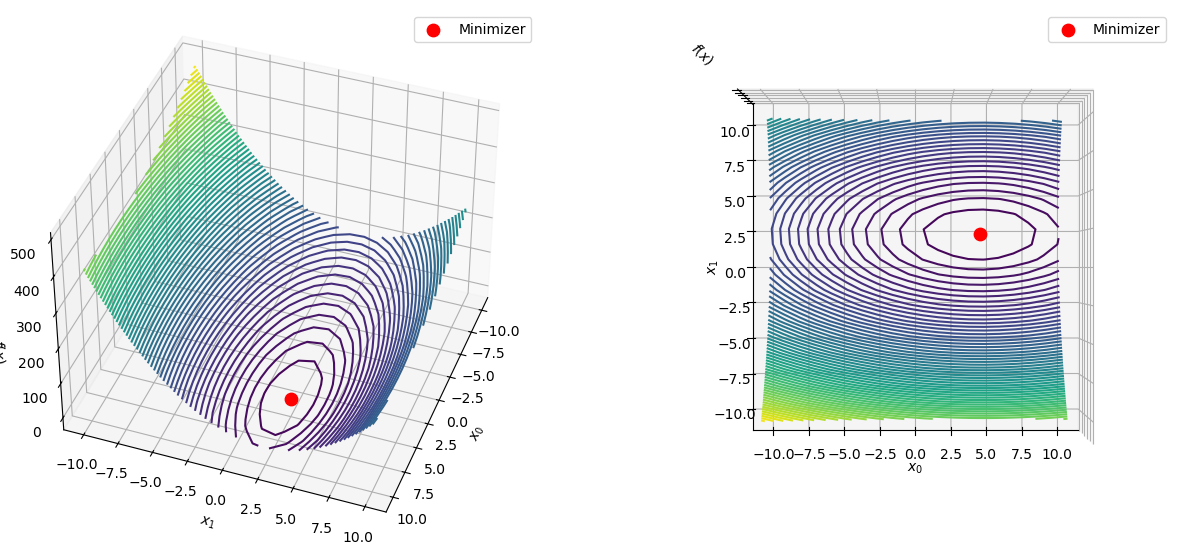

In [4]:
# Generate mesh grid for the function visualization
x_vals = np.linspace(-10, 10, 20)
y_vals = np.linspace(-10, 10, 20)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_values = f(np.array([X_grid, Y_grid]))

# Extract minimizer coordinates
opt_x0, opt_x1 = np.meshgrid(result.x[0], result.x[1])
opt_z = f(np.stack([opt_x0, opt_x1]))

# Initialize figure
fig = plt.figure(figsize=(15, 20))

# First 3D contour plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.contour3D(X_grid, Y_grid, Z_values, levels=60, cmap='viridis')
ax1.scatter(opt_x0, opt_x1, opt_z, color='red', s=80, label='Minimizer')
ax1.set_xlabel('$x_0$')
ax1.set_ylabel('$x_1$')
ax1.set_zlabel('$f(x)$')
ax1.view_init(elev=40, azim=20)
ax1.legend()

# Second 3D contour plot (Top-down view)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.contour3D(X_grid, Y_grid, Z_values, levels=60, cmap='viridis')
ax2.scatter(opt_x0, opt_x1, opt_z, color='red', s=80, label='Minimizer')
ax2.set_xlabel('$x_0$')
ax2.set_ylabel('$x_1$')
ax2.set_zlabel('$f(x)$')
ax2.axes.zaxis.set_ticklabels([])
ax2.view_init(elev=90, azim=-90)  # Top-down view
ax2.legend()

plt.show()


## Steepest Descent

- Given an initial point $\mathbf{x}_0$, the method follows the update rule:
\begin{equation}
        \mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{p}_k,
\end{equation}

- $\mathbf{p}_k$: Search direction.
- $\alpha_k > 0$: Step length.
    
    
For each iteration $k$, the objective is to compute acceptable $\mathbf{p}_k$ and $\alpha_k > 0$ that satisfies certain standard conditions.


**The Algorithm**

We can now outline the necessary steps for the **steepest descent method**:

- Select a starting point $x=x_0$.
- Choose a maximum number of iterations $M$.
- Set a tolerance `tol` close to zero to evaluate the gradient.
- Initialize the step counter $k$.

- Iterative Process (repeat in a loop)
   1. Compute the next point: $ \mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{p}_k$
   2. Evaluate the new gradient:$ \nabla f(\mathbf{x})$
   4. Increment the step counter: $k=k+1$.
   5. Check for stopping conditions:
      - If the gradient norm is sufficiently small: $|\nabla f(\mathbf{x})| < TOL$
      - OR if the maximum number of iterations is reached: $k = M$, then exit the loop.
    6. **Return** the minimum $\mathbf{x}^*$.


In [5]:
def steepest_descent(gradient, x0=np.zeros(2), alpha=0.01, max_iter=10000, tolerance=1e-10): 
    '''
    Steepest descent with a fixed step size.

    Args:
      - gradient: Function computing the gradient of the objective.
      - x0: Initial guess for (x_0, x_1) (default: zeros) <numpy.ndarray>.
      - alpha: Step size parameter (default: 0.01).
      - max_iter: Maximum number of iterations (default: 10,000).
      - tolerance: Convergence criterion based on gradient norm (default: 1e-10).

    Returns:
      - results: <numpy.ndarray> of shape (n_iter, 2) with (x_0, x_1) at each step.
      - num_steps: <int> Total number of iterations performed.
    '''

    # Initialize the array to store iterations
    results = np.array([])

    # Compute initial gradient
    grad_val = gradient(x0)

    # Initialize step counter
    num_iterations = 0

    # Set initial point
    x = x0
    results = np.append(results, x, axis=0)

    # Iterate until convergence or max iterations reached
    while any(abs(grad_val) > tolerance) and num_iterations < max_iter:

        # Move in the direction of the negative gradient
        x = x - alpha * grad_val

        # Store new point
        results = np.append(results, x, axis=0)

        # Compute new gradient
        grad_val = gradient(x)

        # Increment step counter
        num_iterations += 1

    # Reshape results for correct output format
    return results.reshape(-1, 2), num_iterations


Call this function to minimize $f(\mathbf{x})$

```python

# Expected Output: 
# Optimal solution: [4.5 2.3]
# Total iterations: 72

In [6]:
# Perform steepest descent optimization
trajectory, num_iterations = steepest_descent(
    df, x0=np.array([-9, -9]), alpha=0.30
)

# Extract the final minimizer
optimal_point = trajectory[-1].round(1)

# Display the results
print('- Optimal solution:', optimal_point)
print('- Total iterations:', num_iterations)


- Optimal solution: [4.5 2.3]
- Total iterations: 72


- Here there is a function to plot the trajectory.

In [7]:
def plot_optimization_trajectory(trajectory, num_iterations, objective_function):
    """
    Plots the optimization trajectory on a 3D surface plot with the objective function contours.
    
    Args:
        - trajectory: <numpy.ndarray> of size (n_iter, 2) with x_0 and x_1 values at each iteration
        - num_iterations: <int> the total number of iterations performed
        - objective_function: function to calculate the objective value, takes a 2D array as input
    """
    # Create a meshgrid for X and Y values for the plot
    X, Y = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))

    # Calculate Z values (the objective function values)
    Z = objective_function(np.array([X, Y]))

    # Extract coordinates of iterates
    X_vals, Y_vals = trajectory[:, 0], trajectory[:, 1]
    Z_vals = objective_function(np.array([X_vals, Y_vals]))

    # Create figure
    fig = plt.figure(figsize=(20, 20))

    # First 3D plot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.contour3D(X, Y, Z, levels=60, cmap='viridis')
    ax1.plot(X_vals, Y_vals, Z_vals, color='red', linewidth=3)
    ax1.scatter(trajectory[-1, 0], trajectory[-1, 1], objective_function(trajectory[-1]), marker='o', color='red', s=100)
    ax1.set_xlabel('$x_0$')
    ax1.set_ylabel('$x_1$')
    ax1.set_zlabel('$f(x)$')
    ax1.view_init(elev=20, azim=20)

    # Second 3D plot
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.contour3D(X, Y, Z, levels=60, cmap='viridis')
    ax2.plot(X_vals, Y_vals, Z_vals, color='red', linewidth=3)
    ax2.scatter(trajectory[-1, 0], trajectory[-1, 1], objective_function(trajectory[-1]), marker='o', color='red', s=100)
    ax2.set_xlabel('$x_0$')
    ax2.set_ylabel('$x_1$')
    ax2.set_zlabel('$f(x)$')
    ax2.axes.zaxis.set_ticklabels([])
    ax2.view_init(elev=90, azim=-90)

    plt.show()


- Plot the trajectory by calling this function

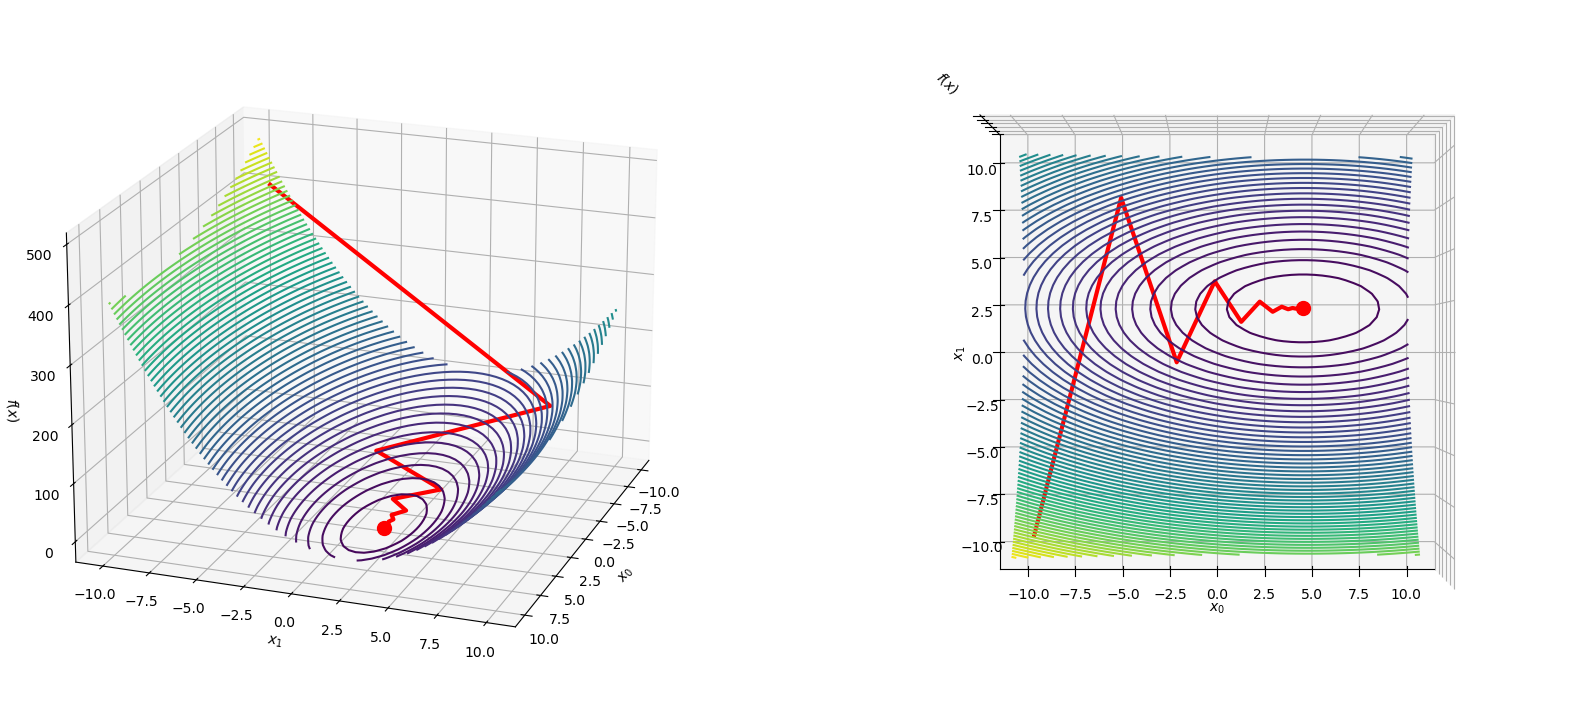

In [8]:
# Call the function to plot the results
plot_optimization_trajectory(trajectory, num_iterations, f)

- Try these values for the learning rate [0.01, 0.25, 0.3, 0.35, 0.4] and analyze what happens.

Testing alpha = 0.01
  - Optimal solution: [4.5 2.3]
  - Total iterations: 2516
Testing alpha = 0.25
  - Optimal solution: [4.5 2.3]
  - Total iterations: 88
Testing alpha = 0.3
  - Optimal solution: [4.5 2.3]
  - Total iterations: 71
Testing alpha = 0.35
  - Optimal solution: [4.5 2.3]
  - Total iterations: 93
Testing alpha = 0.4
  - Optimal solution: [ 4.5 -5. ]
  - Total iterations: 3000


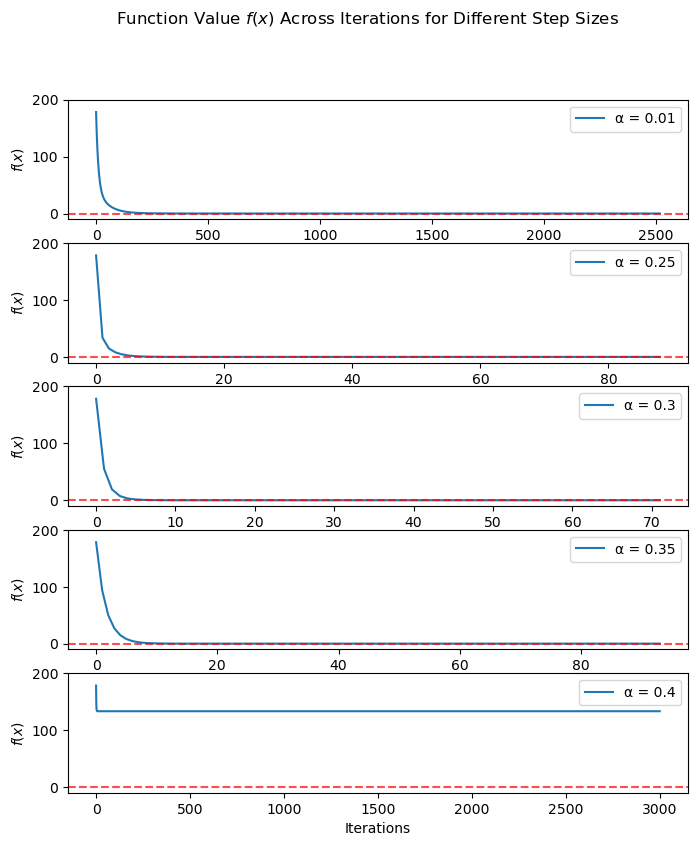

In [9]:
# Define step sizes to test
step_sizes = [0.01, 0.25, 0.3, 0.35, 0.4]

# Arrays to store optimization paths
x_trajectories, y_trajectories, z_trajectories = [], [], []

# Set up figure for function value plots
fig, axes = plt.subplots(len(step_sizes), figsize=(8, 9))
fig.suptitle('Function Value $f(x)$ Across Iterations for Different Step Sizes')

# Loop through different step sizes
for idx, step in enumerate(step_sizes):

    # Run steepest descent for the current step size
    path, iterations = steepest_descent(
        df, x0=np.array([-5, -5]), alpha=step, max_iter=3000
    )

    # Display results
    print(f'Testing alpha = {step}')
    print(f'  - Optimal solution: {path[-1].round(1)}')
    print(f'  - Total iterations: {iterations}')

    # Store optimization trajectory for later visualization
    x_trajectories.append(path[:, 0])
    y_trajectories.append(path[:, 1])
    z_trajectories.append(f(np.array([path[:, 0], path[:, 1]])))

    # Plot function values across iterations
    axes[idx].plot([f(p) for p in path], label=f'α = {step}')
    axes[idx].axhline(y=0, color='r', alpha=0.7, linestyle='dashed')
    axes[idx].set_xlabel('Iterations')
    axes[idx].set_ylabel('$f(x)$')
    axes[idx].set_ylim([-10, 200])
    axes[idx].legend(loc='upper right')

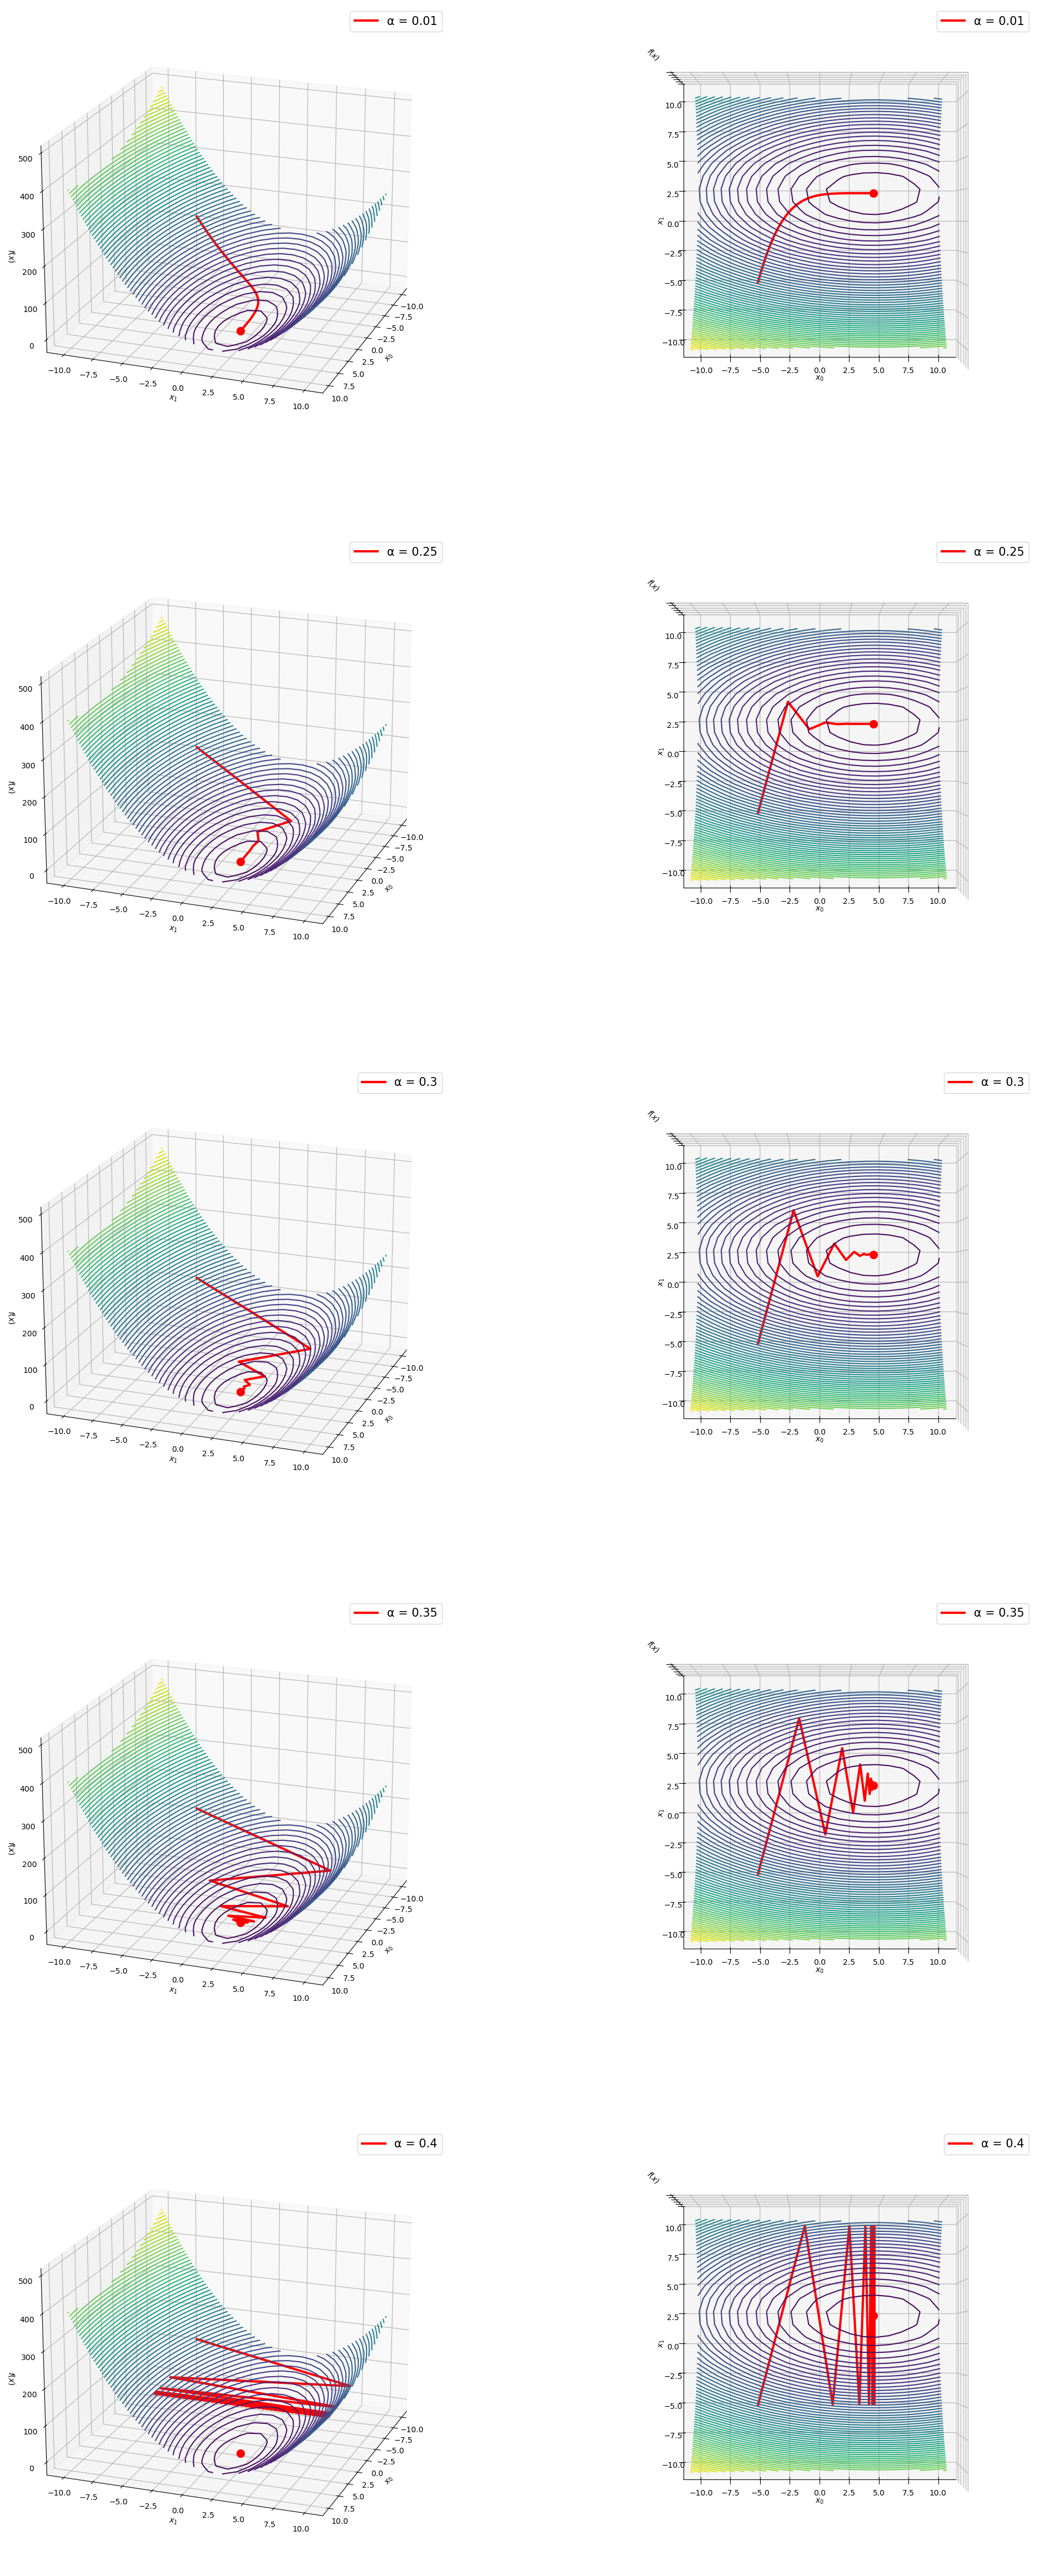

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the objective function between -10 and 10
X, Y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
Z = f(np.array([X, Y]))

# Find the minimum point using steepest descent
optimal_point = trajectory[-1]  # Last point from the descent
min_x0, min_x1 = optimal_point  # Extract x0 and x1
min_z = f(optimal_point)  # Compute function value at the minimum

# Loop through each step size to generate plots
fig = plt.figure(figsize=(25, 60))

for idx, step in enumerate(step_sizes):

    # First 3D plot
    ax1 = fig.add_subplot(5, 2, (idx * 2) + 1, projection='3d')
    ax1.contour3D(X, Y, Z, levels=60, cmap='viridis')
    ax1.plot(x_trajectories[idx], y_trajectories[idx], z_trajectories[idx], 
             color='red', linewidth=3, label=f'α = {step}')
    ax1.scatter(min_x0, min_x1, min_z, marker='o', color='red', s=100)
    ax1.set_xlabel('$x_0$')
    ax1.set_ylabel('$x_1$')
    ax1.set_zlabel('$f(x)$')
    ax1.view_init(20, 20)
    ax1.legend(prop={'size': 15})

    # Second 3D plot with a different perspective
    ax2 = fig.add_subplot(5, 2, (idx * 2) + 2, projection='3d')
    ax2.contour3D(X, Y, Z, levels=60, cmap='viridis')
    ax2.plot(x_trajectories[idx], y_trajectories[idx], z_trajectories[idx], 
             color='red', linewidth=3, label=f'α = {step}')
    ax2.scatter(min_x0, min_x1, min_z, marker='o', color='red', s=100)
    ax2.set_xlabel('$x_0$')
    ax2.set_ylabel('$x_1$')
    ax2.set_zlabel('$f(x)$')
    ax2.axes.zaxis.set_ticklabels([])
    ax2.view_init(90, -90)
    ax2.legend(prop={'size': 15})


- Implement **Armijo Condition** to select the step length.


\begin{equation}
  f(\mathbf{x}_{k+1}) \leq f(\mathbf{x}_k) + c_1 \alpha_k \nabla f(\mathbf{x}_k)^T \mathbf{p}_k, \qquad 0 < c_1 < 1.
    \end{equation}
   Ensures that the objective function decreases sufficiently along the direction $\mathbf{p}_k$.

Instructions:

  0. For the Gradient Descent $\mathbf{p}=-\nabla f(\mathbf{x})$
  2. Before updating the value of $\mathbf{x}$, define an initial guess of $\alpha_0=1$.
  3. Half this value until the Armijo condition is met.
  4. Once the Armijo condition is met, use this $\alpha$ to update $\mathbf{x}$.


The name of this procedure is called **backtracking line search**.

In [11]:
def linesearcharmijo(fun, xk, pk, gfk, alpha0, rho=0.5, c1=1e-4):
    '''
    Minimize over alpha, the function f(xₖ + αpₖ).
    α > 0 is assumed to be a descent direction.
    
    Parameters
    --------------------
    fun: callable
        Function to be minimized.
    xk : array
        Current point.
    pk : array
        Search direction.
    gfk : array
        Gradient of f at point xk.
    alpha0 : scalar
        Value of alpha at the start of the optimization.
    rho : float, optional
        Value of alpha shrinkage factor.
    c1 : float, optional
        Value to control stopping criterion.
    
    Returns
    --------------------
    alpha : scalar
        Value of alpha at the end of the optimization.
    phi : float
        Value of f at the new point x_{k+1}.
    '''
    derf0 = np.dot(gfk, pk)
    f_a0 = fun(xk + alpha0*pk)
    f_x=fun(xk)
    
    while not f_a0 <= f_x + c1*alpha0*derf0:
        alpha0 = alpha0 * rho
        f_a0 = fun(xk + alpha0*pk)
    
    return alpha0

- Include the line search in the gradient descent function

In [12]:
def steepest_descent_ls(fun, gradient, x0=np.zeros(2), alpha=1, max_iter=10000, tolerance=1e-10):  
    '''
    Steepest descent optimization using an adaptive step size (Armijo condition).

    Args:
      - f : Callable Function to be minimized.
      - gradient: Callable function computing the gradient of the objective function.
      - x0: Initial guess for (x_0, x_1) (default: zeros) <numpy.ndarray>.
      - max_iter: Maximum number of iterations allowed (default: 10,000).
      - tolerance: Convergence criterion based on gradient norm (default: 1e-10).

    Returns:
      - results: <numpy.ndarray> of shape (n_iter, 2) storing (x_0, x_1) at each step.
      - num_iterations: <int> Total number of iterations performed.
    '''

    # Initialize storage for the results
    results = np.array([])

    # Initialize iteration counter
    num_iterations = 0
    
    # Set the initial point and the initial gradient
    xk = x0
    grad_val_k = gradient(x0)
    
    results = np.append(results, xk, axis=0)

    # Iterate until convergence or reaching the iteration limit
    while any(abs(grad_val_k) > tolerance) and num_iterations < max_iter:

        # determine descending direction
        pk = -grad_val_k
        
        # Compute step size using Armijo condition (adaptive step size)
        step_size = linesearcharmijo(fun, xk, pk, grad_val_k, alpha0=alpha, rho=0.5, c1=1e-4)

        # Update current position by moving along the negative gradient
        xk = xk + step_size * pk

        # Store the new point in the results
        results = np.append(results, xk, axis=0)

        # Compute the new gradient
        grad_val_k = gradient(xk)

        # Increment iteration counter
        num_iterations += 1

    # Found minimizer
#    minimizer = results[-1].round(1)
    f_val=fun(xk)

    # Print results
    print('- Function minima:', f_val)
    print('- Final point:', xk)
    print('- N° steps:  {}'.format(num_iterations))

    # Reshape and return results
    return f_val, results.reshape(-1, 2), num_iterations


- Compute the minimum of $f(\mathbf{x})$

In [13]:
# Steepest descent
minima, points, iters = steepest_descent_ls(
  f, df, x0 = np.array([-9, -9]), tolerance=1e-6)


- Function minima: 2.3420721846069083e-13
- Final point: [4.49999942 2.30000016]
- N° steps:  35


- Repeat the process for the Griewank function:

\begin{equation}
f(x) = -20 \exp\left(-0.2 \sqrt{\frac{x_1^2 + x_2^2}{2}}\right) - \exp\left(\frac{1}{2} \left( \cos(2 \pi x_1) + \cos(2 \pi x_2) \right)\right) + \exp(1) + 20
\end{equation}

In [14]:
def ackley(x):
    """
    Ackley function for a 2D input.

    Args:
        x (numpy.ndarray): Input vector of shape (2,)

    Returns:
        float: Function value at x.
    """
    term1 = -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2)))
    term2 = -np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1])))
    return term1 + term2 + np.e + 20

def ackley_gradient(x):
    """
    Gradient of the Ackley function for a 2D input.

    Args:
        x (numpy.ndarray): Input vector of shape (2,)

    Returns:
        numpy.ndarray: Gradient vector of shape (2,)
    """
    term1_x1 = (20 * x[0]) / np.sqrt(0.5 * (x[0]**2 + x[1]**2)) * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2)))
    term1_x2 = (20 * x[1]) / np.sqrt(0.5 * (x[0]**2 + x[1]**2)) * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2)))
    
    term2_x1 = 2 * np.pi * np.sin(2 * np.pi * x[0]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1])))
    term2_x2 = 2 * np.pi * np.sin(2 * np.pi * x[1]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1])))

    grad_x1 = term1_x1 + term2_x1
    grad_x2 = term1_x2 + term2_x2
    
    return np.array([grad_x1, grad_x2])

Plot the shape of the function evaluating the following code:

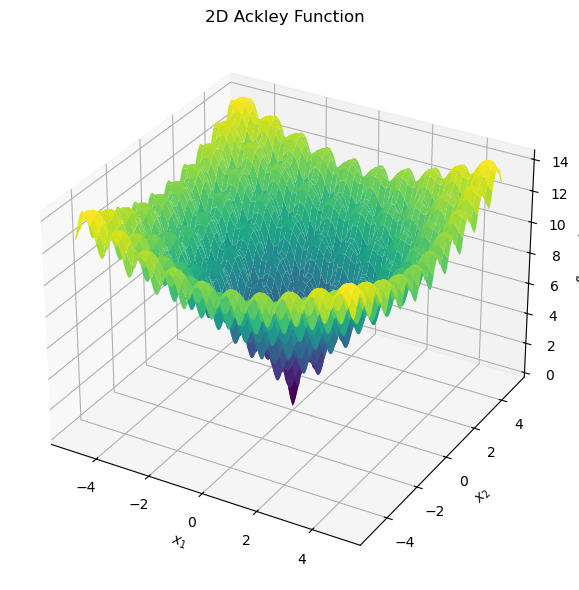

In [15]:
from itertools import product  # Import the product function from itertools

# Define the Griewank function (make sure it's defined or replace with the correct one)
#def Griewank_plot(x):
    # Example implementation of Griewank function
#    return 1 + (1/4000) * (x[0]**2 + x[1]**2) - np.cos(x[0]) * np.cos(x[1] / np.sqrt(2))

# Generate grid
x = np.arange(-5, 5, 0.025)
y = np.arange(-5, 5, 0.025)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

# Iterate through the grid to compute Z values using the Griewank function
mesh_size = range(len(X))
for i, j in product(mesh_size, mesh_size):
    x_coor = X[i][j]
    y_coor = Y[i][j]
    Z[i][j] = ackley(np.array([x_coor, y_coor]))

# Plot the surface
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')  # Use add_subplot with 'projection' argument
ax.set_title('2D Ackley Function')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.tight_layout()
plt.show()

- Use the following function to represent the results in the next examples.

In [16]:
def plot_optimization_trajectory_wider(trajectory, num_iterations, objective_function):
    """
    Plots the optimization trajectory on a 3D surface plot with the objective function contours.
    
    Args:
        - trajectory: <numpy.ndarray> of size (n_iter, 2) with x_0 and x_1 values at each iteration
        - num_iterations: <int> the total number of iterations performed
        - objective_function: function to calculate the objective value, takes a 2D array as input
    """
    # Create a meshgrid for X and Y values for the plot
    X, Y = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))

    # Calculate Z values (the objective function values)
    Z = objective_function(np.array([X, Y]))

    # Extract coordinates of iterates
    X_vals, Y_vals = trajectory[:, 0], trajectory[:, 1]
    Z_vals = objective_function(np.array([X_vals, Y_vals]))

    # Create figure
    fig = plt.figure(figsize=(20, 20))

    # First 3D plot (with surface and trajectory)
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.contour3D(X, Y, Z, levels=60, cmap='viridis')
    ax1.plot(X_vals, Y_vals, Z_vals, color='red', linewidth=3)
    ax1.scatter(trajectory[-1, 0], trajectory[-1, 1], objective_function(trajectory[-1]), marker='o', color='red', s=100)
    ax1.set_xlabel('$x_0$')
    ax1.set_ylabel('$x_1$')
    ax1.set_zlabel('$f(x)$')
    ax1.view_init(elev=20, azim=20)

    # Second 3D plot (contours and trajectory)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    
    # Reduce the contour levels to make the plot clearer
    ax2.contour(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 10), cmap='viridis')  # Sparse contour lines
    ax2.plot(X_vals, Y_vals, Z_vals, color='red', linewidth=3)  # Plot trajectory on contours
    ax2.scatter(trajectory[-1, 0], trajectory[-1, 1], objective_function(trajectory[-1]), marker='o', color='red', s=100)
    ax2.set_xlabel('$x_0$')
    ax2.set_ylabel('$x_1$')
    ax2.axes.zaxis.set_ticklabels([])  # Remove z axis ticks
    ax2.view_init(elev=90, azim=-90)

    plt.show()


- Compute the minima for different starting points and learning rates.

In [17]:
fminima, points, iters = steepest_descent_ls(
  ackley, ackley_gradient, x0 = np.array([-9, -9]), alpha=1, tolerance=1e-6)

- Function minima: 0.0
- Final point: [-2.35226599e-16 -2.35226599e-16]
- N° steps:  10000


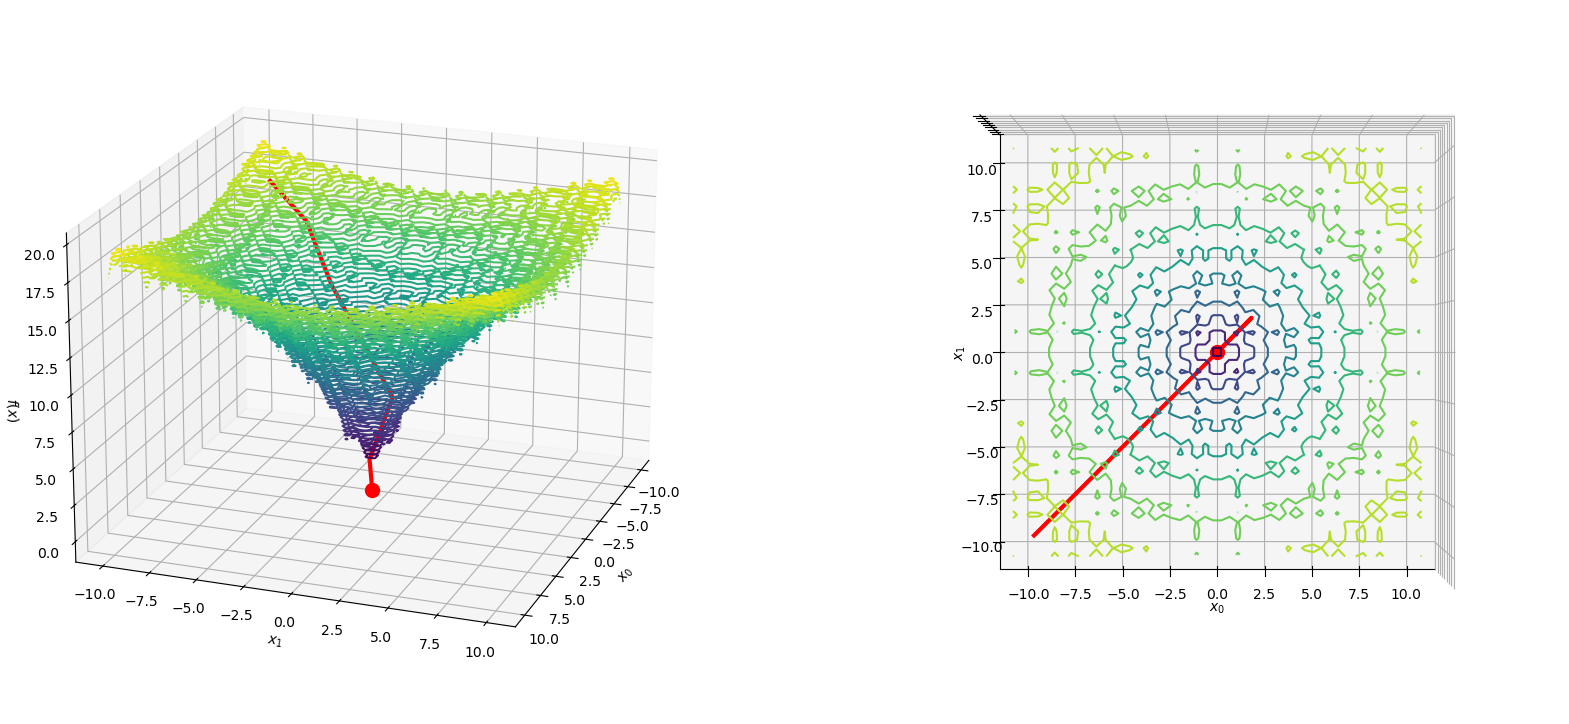

In [18]:
plot_optimization_trajectory_wider(points, iters, ackley)

- Repeat the process for the Griewank function:

\begin{equation}
    f(x) = 1 + \frac{1}{4000} \left( x_1^2 + x_2^2 \right) - \prod_{i=1}^{2} \cos\left( \frac{x_i}{\sqrt{i}} \right)
\end{equation}

In [19]:
# Griewank function (2D)
def griewank(x):
    x1, x2 = x[0], x[1]
    term1 = (x1**2 + x2**2) / 4000
    term2 = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return 1 + term1 - term2

# Gradient of the Griewank function (2D)
def griewank_gradient(x):
    x1, x2 = x[0], x[1]
    
    # Derivative with respect to x1
    df_dx1 = x1 / 2000 + np.sin(x1 / np.sqrt(1)) / np.sqrt(1)
    
    # Derivative with respect to x2
    df_dx2 = x2 / 2000 + np.sin(x2 / np.sqrt(2)) / np.sqrt(2)
    
    return np.array([df_dx1, df_dx2])

Plot the shape of the function evaluating the following code:

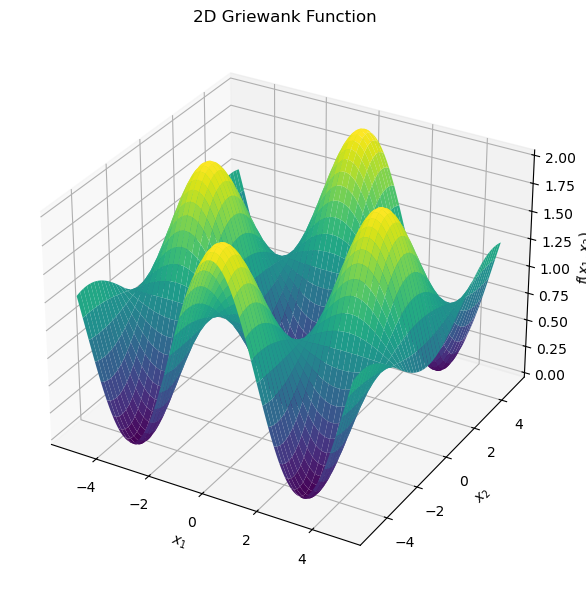

In [20]:
from itertools import product  # Import the product function from itertools

# Define the Griewank function (make sure it's defined or replace with the correct one)
#def Griewank_plot(x):
    # Example implementation of Griewank function
#    return 1 + (1/4000) * (x[0]**2 + x[1]**2) - np.cos(x[0]) * np.cos(x[1] / np.sqrt(2))

# Generate grid
x = np.arange(-5, 5, 0.025)
y = np.arange(-5, 5, 0.025)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

# Iterate through the grid to compute Z values using the Griewank function
mesh_size = range(len(X))
for i, j in product(mesh_size, mesh_size):
    x_coor = X[i][j]
    y_coor = Y[i][j]
    Z[i][j] = griewank(np.array([x_coor, y_coor]))

# Plot the surface
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')  # Use add_subplot with 'projection' argument
ax.set_title('2D Griewank Function')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.tight_layout()
plt.show()


- Compute the minima for different starting points and learning rates.

In [21]:
fvalmin, xpoints, xiters = steepest_descent_ls(
  griewank, griewank_gradient, x0 = np.array([-2,9]), alpha=1, tolerance=1e-6)

- Function minima: 0.019719489249042543
- Final point: [1.56559012e-46 8.87689078e+00]
- N° steps:  16


- Plot the result.

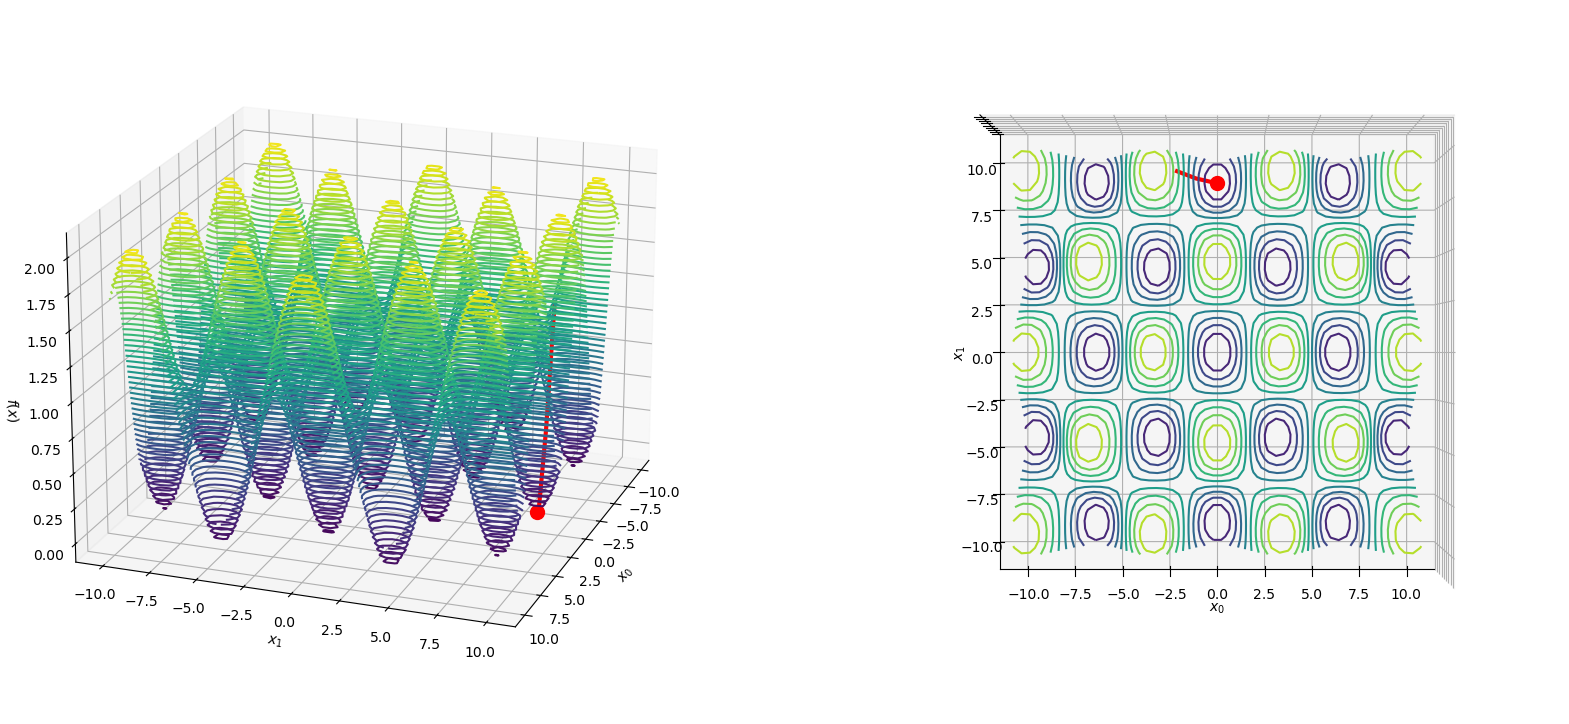

In [22]:
plot_optimization_trajectory_wider(xpoints, xiters, griewank)